In [13]:

import qiskit.tools.jupyter
%qiskit_version_table

In [22]:
import qiskit
from qiskit import *
from qiskit.visualization import plot_histogram


import tensorflow as tf
import numpy as np
import pandas as pd

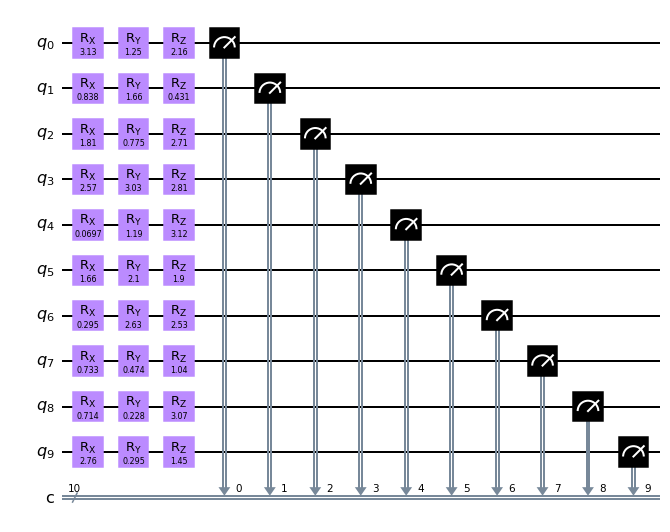

In [102]:
number = 10
qc = QuantumCircuit(number, number)

rng = np.random.default_rng()

for i in range(number):
    qc.rx(rng.random() * np.pi, i)
    qc.ry(rng.random() * np.pi, i)
    qc.rz(rng.random() * np.pi, i)
    
qc.measure(range(number), range(number))
qc.draw("mpl")

In [103]:
backend = Aer.get_backend('qasm_simulator')
circ = transpile(qc, backend)

from qiskit.compiler import assemble
qobj = assemble(circ, shots=5000)

# Run and get counts
result = backend.run(qobj).result()
counts = result.get_counts()
# plot_histogram(counts)

In [104]:
df = pd.DataFrame(counts, index=[0], columns = None)

In [105]:
df

,0000010000,0101000000,0101000001,0101000010,0101000011,0101000100,0101000101,0101000111,0101001111,0101010010,...,0011100010,0011100101,0011100111,0011101101,0011101110,0011101111,0011110010,0011110101,0011110111,0011111011
0,1,1,3,2,1,1,2,5,1,2,...,1,5,3,1,1,1,1,1,1,1


In [106]:
np.squeeze(df.values)

array([  1,   1,   3,   2,   1,   1,   2,   5,   1,   2,   1,   1,   1,
         1,   5,   3,   1,   1,   1,   2,   1,   1,   2,   1,   1,   1,
         1,   1,   1,   1,  10,  16,   6,  11,   9,  22,  11,  21,   2,
         3,   1,   1,   3,   1,   2,   7,   3,   1,   6,   8,   8,   8,
         1,   2,   1,   3,  10,   3,  15,  11,  17,   6,  19,   1,   1,
         1,   1,   1,   2,   7,   3,   5,   1,   7,   3,   8,   1,   1,
         1,  67, 147,  66, 137,  82, 196, 118, 216,   7,  11,  11,  18,
        13,  16,  11,  24,   4,  30,  63,  32,  63,  52,  73,  37,  95,
         1,  11,   3,   4,   5,   7,   7,  11,  73, 123,  67, 123,  94,
       175,  88, 189,   6,  10,   5,  11,   7,  12,   9,  12,   1,  34,
        61,  33,  47,  40,  80,  53,  87,   1,   4,   2,   3,   1,   4,
         5,   9,   2,   2,   4,   7,   2,   2,   6,   1,   1,   1,   1,
         1,   3,   2,   1,   1,   3,   3,   1,   1,   1,   1,   2,   1,
        15,  31,  17,  40,  15,  37,  17,  30,   2,   3,   2,   

In [107]:
a

array(['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111',
       '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111'],
      dtype=object)

In [108]:
a = np.array(df.columns)
[int(i, 2) for i in a]

[16,
 320,
 321,
 322,
 323,
 324,
 325,
 327,
 335,
 338,
 343,
 22,
 352,
 353,
 355,
 357,
 358,
 359,
 366,
 23,
 369,
 373,
 450,
 459,
 467,
 480,
 487,
 498,
 501,
 2,
 512,
 513,
 514,
 515,
 516,
 517,
 518,
 519,
 521,
 523,
 525,
 526,
 527,
 33,
 528,
 529,
 530,
 531,
 532,
 533,
 534,
 535,
 537,
 541,
 543,
 544,
 545,
 546,
 547,
 548,
 549,
 550,
 551,
 553,
 554,
 555,
 557,
 559,
 560,
 561,
 562,
 563,
 564,
 565,
 566,
 567,
 572,
 573,
 36,
 576,
 577,
 578,
 579,
 580,
 581,
 582,
 583,
 584,
 585,
 586,
 587,
 588,
 589,
 590,
 591,
 37,
 592,
 593,
 594,
 595,
 596,
 597,
 598,
 599,
 600,
 601,
 602,
 603,
 604,
 605,
 606,
 607,
 608,
 609,
 610,
 611,
 612,
 613,
 614,
 615,
 616,
 617,
 618,
 619,
 620,
 621,
 622,
 623,
 39,
 624,
 625,
 626,
 627,
 628,
 629,
 630,
 631,
 632,
 633,
 634,
 635,
 636,
 637,
 638,
 639,
 640,
 641,
 642,
 643,
 644,
 645,
 647,
 653,
 655,
 657,
 660,
 662,
 672,
 673,
 675,
 676,
 677,
 678,
 683,
 688,
 690,
 691,
 692,
 

In [109]:
# for element in dataset:
#     print(element)

In [110]:
dataset = tf.data.Dataset.from_tensors((np.squeeze(df.values), np.array([int(i, 2) for i in np.array(df.columns)])))

In [111]:
train_dataset = dataset.shuffle(len(df.columns))

In [114]:
from tensorflow.keras.layers import Dense

model = tf.keras.Sequential([
    Dense(5, input_shape=(1, ), activation=tf.nn.relu),
    Dense(8, activation=tf.nn.relu),
    Dense(1, activation=tf.nn.sigmoid)
])

model.compile(optimizer="adam", loss="mean_squared_error")

model.fit(train_dataset, epochs=1000)

Train for 1 steps
Epoch 1/1000
1/1 [==============================] - 0s 265ms/step - loss: 419155.9375
Epoch 2/1000
1/1 [==============================] - 0s 9ms/step - loss: 419153.1562
Epoch 3/1000
1/1 [==============================] - 0s 9ms/step - loss: 419150.3750
Epoch 4/1000
1/1 [==============================] - 0s 9ms/step - loss: 419147.5312
Epoch 5/1000
1/1 [==============================] - 0s 10ms/step - loss: 419144.6250
Epoch 6/1000
1/1 [==============================] - 0s 10ms/step - loss: 419141.7188
Epoch 7/1000
1/1 [==============================] - 0s 9ms/step - loss: 419138.9375
Epoch 8/1000
1/1 [==============================] - 0s 8ms/step - loss: 419136.3125
Epoch 9/1000
1/1 [==============================] - 0s 9ms/step - loss: 419133.9375
Epoch 10/1000
1/1 [==============================] - 0s 9ms/step - loss: 419131.7500
Epoch 11/1000
1/1 [==============================] - 0s 9ms/step - loss: 419129.9062
Epoch 12/1000
1/1 [==============================] -

1/1 [==============================] - 0s 8ms/step - loss: 418670.4688
Epoch 98/1000
1/1 [==============================] - 0s 8ms/step - loss: 418666.0000
Epoch 99/1000
1/1 [==============================] - 0s 8ms/step - loss: 418661.7500
Epoch 100/1000
1/1 [==============================] - 0s 8ms/step - loss: 418657.6875
Epoch 101/1000
1/1 [==============================] - 0s 8ms/step - loss: 418653.8125
Epoch 102/1000
1/1 [==============================] - 0s 8ms/step - loss: 418650.1250
Epoch 103/1000
1/1 [==============================] - 0s 10ms/step - loss: 418646.5000
Epoch 104/1000
1/1 [==============================] - 0s 9ms/step - loss: 418643.1250
Epoch 105/1000
1/1 [==============================] - 0s 9ms/step - loss: 418639.8750
Epoch 106/1000
1/1 [==============================] - 0s 9ms/step - loss: 418636.6250
Epoch 107/1000
1/1 [==============================] - 0s 9ms/step - loss: 418633.5625
Epoch 108/1000
1/1 [==============================] - 0s 10ms/step - l

Epoch 193/1000
1/1 [==============================] - 0s 8ms/step - loss: 418495.2812
Epoch 194/1000
1/1 [==============================] - 0s 9ms/step - loss: 418494.2812
Epoch 195/1000
1/1 [==============================] - 0s 8ms/step - loss: 418493.1875
Epoch 196/1000
1/1 [==============================] - 0s 8ms/step - loss: 418492.0938
Epoch 197/1000
1/1 [==============================] - 0s 9ms/step - loss: 418491.0000
Epoch 198/1000
1/1 [==============================] - 0s 9ms/step - loss: 418489.9375
Epoch 199/1000
1/1 [==============================] - 0s 8ms/step - loss: 418488.8438
Epoch 200/1000
1/1 [==============================] - 0s 11ms/step - loss: 418487.7188
Epoch 201/1000
1/1 [==============================] - 0s 11ms/step - loss: 418486.7500
Epoch 202/1000
1/1 [==============================] - 0s 8ms/step - loss: 418485.6875
Epoch 203/1000
1/1 [==============================] - 0s 8ms/step - loss: 418484.6250
Epoch 204/1000
1/1 [==============================] 

Epoch 288/1000
1/1 [==============================] - 0s 8ms/step - loss: 418410.4688
Epoch 289/1000
1/1 [==============================] - 0s 8ms/step - loss: 418409.7500
Epoch 290/1000
1/1 [==============================] - 0s 9ms/step - loss: 418409.0000
Epoch 291/1000
1/1 [==============================] - 0s 9ms/step - loss: 418408.2812
Epoch 292/1000
1/1 [==============================] - 0s 8ms/step - loss: 418407.5312
Epoch 293/1000
1/1 [==============================] - 0s 8ms/step - loss: 418406.8438
Epoch 294/1000
1/1 [==============================] - 0s 8ms/step - loss: 418406.1875
Epoch 295/1000
1/1 [==============================] - 0s 8ms/step - loss: 418405.4062
Epoch 296/1000
1/1 [==============================] - 0s 10ms/step - loss: 418404.7188
Epoch 297/1000
1/1 [==============================] - 0s 10ms/step - loss: 418404.0000
Epoch 298/1000
1/1 [==============================] - 0s 8ms/step - loss: 418403.2812
Epoch 299/1000
1/1 [==============================] 

Epoch 383/1000
1/1 [==============================] - 0s 9ms/step - loss: 418354.1875
Epoch 384/1000
1/1 [==============================] - 0s 10ms/step - loss: 418353.7188
Epoch 385/1000
1/1 [==============================] - 0s 8ms/step - loss: 418353.3438
Epoch 386/1000
1/1 [==============================] - 0s 8ms/step - loss: 418352.8438
Epoch 387/1000
1/1 [==============================] - 0s 9ms/step - loss: 418352.3750
Epoch 388/1000
1/1 [==============================] - 0s 8ms/step - loss: 418351.9375
Epoch 389/1000
1/1 [==============================] - 0s 9ms/step - loss: 418351.4688
Epoch 390/1000
1/1 [==============================] - 0s 9ms/step - loss: 418351.0625
Epoch 391/1000
1/1 [==============================] - 0s 9ms/step - loss: 418350.5938
Epoch 392/1000
1/1 [==============================] - 0s 9ms/step - loss: 418350.1562
Epoch 393/1000
1/1 [==============================] - 0s 9ms/step - loss: 418349.7188
Epoch 394/1000
1/1 [==============================] -

1/1 [==============================] - 0s 9ms/step - loss: 418321.0625
Epoch 479/1000
1/1 [==============================] - 0s 9ms/step - loss: 418320.8438
Epoch 480/1000
1/1 [==============================] - 0s 9ms/step - loss: 418320.5625
Epoch 481/1000
1/1 [==============================] - 0s 10ms/step - loss: 418320.3125
Epoch 482/1000
1/1 [==============================] - 0s 10ms/step - loss: 418320.0625
Epoch 483/1000
1/1 [==============================] - 0s 9ms/step - loss: 418319.8125
Epoch 484/1000
1/1 [==============================] - 0s 10ms/step - loss: 418319.5000
Epoch 485/1000
1/1 [==============================] - 0s 9ms/step - loss: 418319.2500
Epoch 486/1000
1/1 [==============================] - 0s 8ms/step - loss: 418319.0625
Epoch 487/1000
1/1 [==============================] - 0s 9ms/step - loss: 418318.7812
Epoch 488/1000
1/1 [==============================] - 0s 8ms/step - loss: 418318.5625
Epoch 489/1000
1/1 [==============================] - 0s 10ms/step

1/1 [==============================] - 0s 9ms/step - loss: 418302.6562
Epoch 574/1000
1/1 [==============================] - 0s 8ms/step - loss: 418302.5000
Epoch 575/1000
1/1 [==============================] - 0s 9ms/step - loss: 418302.3750
Epoch 576/1000
1/1 [==============================] - 0s 10ms/step - loss: 418302.1875
Epoch 577/1000
1/1 [==============================] - 0s 10ms/step - loss: 418302.0312
Epoch 578/1000
1/1 [==============================] - 0s 9ms/step - loss: 418301.9688
Epoch 579/1000
1/1 [==============================] - 0s 9ms/step - loss: 418301.8125
Epoch 580/1000
1/1 [==============================] - 0s 10ms/step - loss: 418301.7188
Epoch 581/1000
1/1 [==============================] - 0s 9ms/step - loss: 418301.5000
Epoch 582/1000
1/1 [==============================] - 0s 9ms/step - loss: 418301.4375
Epoch 583/1000
1/1 [==============================] - 0s 9ms/step - loss: 418301.2812
Epoch 584/1000
1/1 [==============================] - 0s 10ms/step

1/1 [==============================] - 0s 10ms/step - loss: 418292.5625
Epoch 669/1000
1/1 [==============================] - 0s 9ms/step - loss: 418292.4688
Epoch 670/1000
1/1 [==============================] - 0s 9ms/step - loss: 418292.4062
Epoch 671/1000
1/1 [==============================] - 0s 9ms/step - loss: 418292.3438
Epoch 672/1000
1/1 [==============================] - 0s 8ms/step - loss: 418292.2500
Epoch 673/1000
1/1 [==============================] - 0s 8ms/step - loss: 418292.1875
Epoch 674/1000
1/1 [==============================] - 0s 10ms/step - loss: 418292.0938
Epoch 675/1000
1/1 [==============================] - 0s 11ms/step - loss: 418292.0312
Epoch 676/1000
1/1 [==============================] - 0s 11ms/step - loss: 418291.9062
Epoch 677/1000
1/1 [==============================] - 0s 10ms/step - loss: 418291.8438
Epoch 678/1000
1/1 [==============================] - 0s 9ms/step - loss: 418291.7500
Epoch 679/1000
1/1 [==============================] - 0s 9ms/ste

1/1 [==============================] - 0s 9ms/step - loss: 418286.8750
Epoch 764/1000
1/1 [==============================] - 0s 9ms/step - loss: 418286.7812
Epoch 765/1000
1/1 [==============================] - 0s 8ms/step - loss: 418286.7500
Epoch 766/1000
1/1 [==============================] - 0s 8ms/step - loss: 418286.7188
Epoch 767/1000
1/1 [==============================] - 0s 9ms/step - loss: 418286.6875
Epoch 768/1000
1/1 [==============================] - 0s 10ms/step - loss: 418286.6562
Epoch 769/1000
1/1 [==============================] - 0s 10ms/step - loss: 418286.5625
Epoch 770/1000
1/1 [==============================] - 0s 9ms/step - loss: 418286.5312
Epoch 771/1000
1/1 [==============================] - 0s 9ms/step - loss: 418286.5000
Epoch 772/1000
1/1 [==============================] - 0s 9ms/step - loss: 418286.4688
Epoch 773/1000
1/1 [==============================] - 0s 9ms/step - loss: 418286.4062
Epoch 774/1000
1/1 [==============================] - 0s 9ms/step -

1/1 [==============================] - 0s 8ms/step - loss: 418283.4375
Epoch 859/1000
1/1 [==============================] - 0s 10ms/step - loss: 418283.4062
Epoch 860/1000
1/1 [==============================] - 0s 10ms/step - loss: 418283.4062
Epoch 861/1000
1/1 [==============================] - 0s 8ms/step - loss: 418283.3438
Epoch 862/1000
1/1 [==============================] - 0s 10ms/step - loss: 418283.3438
Epoch 863/1000
1/1 [==============================] - 0s 10ms/step - loss: 418283.2812
Epoch 864/1000
1/1 [==============================] - 0s 10ms/step - loss: 418283.2500
Epoch 865/1000
1/1 [==============================] - 0s 9ms/step - loss: 418283.2500
Epoch 866/1000
1/1 [==============================] - 0s 9ms/step - loss: 418283.2500
Epoch 867/1000
1/1 [==============================] - 0s 11ms/step - loss: 418283.2188
Epoch 868/1000
1/1 [==============================] - 0s 8ms/step - loss: 418283.1875
Epoch 869/1000
1/1 [==============================] - 0s 8ms/st

Epoch 953/1000
1/1 [==============================] - 0s 9ms/step - loss: 418281.3125
Epoch 954/1000
1/1 [==============================] - 0s 8ms/step - loss: 418281.3125
Epoch 955/1000
1/1 [==============================] - 0s 10ms/step - loss: 418281.3125
Epoch 956/1000
1/1 [==============================] - 0s 10ms/step - loss: 418281.2500
Epoch 957/1000
1/1 [==============================] - 0s 10ms/step - loss: 418281.2188
Epoch 958/1000
1/1 [==============================] - 0s 8ms/step - loss: 418281.2188
Epoch 959/1000
1/1 [==============================] - 0s 10ms/step - loss: 418281.2188
Epoch 960/1000
1/1 [==============================] - 0s 9ms/step - loss: 418281.1562
Epoch 961/1000
1/1 [==============================] - 0s 10ms/step - loss: 418281.1562
Epoch 962/1000
1/1 [==============================] - 0s 10ms/step - loss: 418281.1562
Epoch 963/1000
1/1 [==============================] - 0s 9ms/step - loss: 418281.1562
Epoch 964/1000
1/1 [============================